In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 7.3 MB/s eta 0:00:00


In [3]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 13.6 MB/s eta 0:00:00


In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
# Modeling
from tensorflow.keras.models import Sequential
import spacy
from bs4 import BeautifulSoup
import regex as re
import unidecode
import contractions
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional

In [6]:
import os

In [7]:
import pandas as pd

In [8]:
Disneyland = pd.read_csv(r"/content/drive/MyDrive/capstone project /DisneylandReviews.csv",encoding="unicode_escape")
Disneyland.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [9]:
Disneyland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [10]:
nlp = spacy.load('en_core_web_sm')

In [11]:
from nltk.stem import WordNetLemmatizer




In [12]:
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator="")
    return stripped_text


def remov_stopwords(text):
    stopwords = set(STOPWORDS)
    text = text.replace(str(stopwords),"")
    return text

def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())



def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text




def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    return text


lemmatizer = WordNetLemmatizer()
def lem (text):
    text = lemmatizer.lemmatize(text)
    return text


pattern = r'[0-9]'
def remove_num(text):
    text = re.sub(pattern, '', text)
    return text



In [13]:
def text_preprocessing(text):
    """preprocess text with default option set to true for all steps"""
    text = remove_num(text)

    text = strip_html_tags(text)
    
    text = remove_whitespace(text)
    
    text = remove_accented_chars(text)
    
    text = expand_contractions(text)
    
    text = lem(text)
    
    text = remov_stopwords(text)

    #text = text.lower()
  
    return text

In [14]:
# labeling the data by utilizing the Rating column
rating = Disneyland["Rating"]
def label_func(rating):
    if rating >=4:
        return "Positive"
    elif rating == 3:
            return "Neutral"
    else:
        return "Negative"
        
Disneyland["Sentiment"] = Disneyland["Rating"].apply(lambda x: label_func(x)) 

In [15]:
df_main = Disneyland.copy()

In [16]:
# subsetting the main dataframe to get only review text and sentiment columns
df_main_class = df_main[["Review_Text","Sentiment"]]

In [17]:
# Before the text processing
df_main_class

,Review_Text,Sentiment
0,If you've ever been to Disneyland anywhere you...,Positive
1,Its been a while since d last time we visit HK...,Positive
2,Thanks God it wasn t too hot or too humid wh...,Positive
3,HK Disneyland is a great compact park. Unfortu...,Positive
4,"the location is not in the city, took around 1...",Positive
...,...,...
42651,i went to disneyland paris in july 03 and thou...,Positive
42652,2 adults and 1 child of 11 visited Disneyland ...,Positive
42653,My eleven year old daughter and myself went to...,Positive
42654,"This hotel, part of the Disneyland Paris compl...",Positive


In [18]:
#Apply the text processing to all of the rows in Review_text column
df_main_class["Review_Text"]= df_main_class["Review_Text"].apply(lambda x: text_preprocessing(x))

<ipython-input-18-8cca00a2a6d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_class["Review_Text"]= df_main_class["Review_Text"].apply(lambda x: text_preprocessing(x))


In [19]:
# After the text processing
df_main_class.head()


,Review_Text,Sentiment
0,If you have ever been to Disneyland anywhere y...,Positive
1,Its been a while since d last time we visit HK...,Positive
2,Thanks God it wasn t too hot or too humid when...,Positive
3,HK Disneyland is a great compact park. Unfortu...,Positive
4,"the location is not in the city, took around h...",Positive


In [20]:
# Get length column for each text
df_main_class['text_lenght'] = df_main_class['Review_Text'].apply(len)

<ipython-input-20-88b466a5a7ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_class['text_lenght'] = df_main_class['Review_Text'].apply(len)


In [21]:
df_main_class["Sentiment"].value_counts()

Positive    33921
Neutral      5109
Negative     3626
Name: Sentiment, dtype: int64

In [22]:
df_main_class['Sentiment'] = df_main_class['Sentiment'].map({'Neutral':0, 'Positive':1,"Negative":2})

<ipython-input-22-f5e06b653368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_class['Sentiment'] = df_main_class['Sentiment'].map({'Neutral':0, 'Positive':1,"Negative":2})


In [23]:
df_main_class["Sentiment"].value_counts()

1    33921
0     5109
2     3626
Name: Sentiment, dtype: int64

In [24]:
df_main_class.head()

,Review_Text,Sentiment,text_lenght
0,If you have ever been to Disneyland anywhere y...,1,330
1,Its been a while since d last time we visit HK...,1,975
2,Thanks God it wasn t too hot or too humid when...,1,918
3,HK Disneyland is a great compact park. Unfortu...,1,485
4,"the location is not in the city, took around h...",1,159


In [25]:
X = df_main_class["Review_Text"]
Y = df_main_class["Sentiment"]

In [26]:
# Train test split
from sklearn.model_selection import train_test_split

In [27]:
# Splitting the data into train and test data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2,random_state = 43)

In [43]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [44]:
Y_train.shape

(34124, 3)

In [45]:
# Defining pre-processing parameters
max_len = 50 
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 500

The Tokenizer API from TensorFlow Keras can split sentences into words and encode them into integers.

The Tokenizer will perform all the necessary pre-processing steps:

tokenize into word character (word level)
num_words for maximum number of unique tokens
filter out the punctuation terms
convert all words to lower case
convert all words to integer index

In [46]:
tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

###num_words : how many unique word that we want to load in training and testing data

###oov_token : out of vocabulary token will be added to word index in the corpus which is used to build the model. This is used to replace out of vocabulary words (words that are not in our corpus) during text_to_sequence calls.

In [47]:
# Get the word_index
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

37993

## Sequence and padding
The next step : Let’s represent each sentence by sequences of numbers using texts_to_sequencesfrom Tokenizer object. After that, we padded the sequence so that we can have same length of each sequence.

# for data train 

In [48]:
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

# For Data test 

In [49]:
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

**padding** : ‘pre’ or ‘post (default pre). By using pre, we’ll pad before each sequence and post will pad after each sequence.

**maxlen** : maximum length of all sequences. If not provided, by default it will use the maximum length of the longest sentence.

**truncating** : ‘pre’ or ‘post’ (default ‘pre’). If a sequence length is larger than the provided maxlen value then, these values will be truncated to maxlen. ‘pre’ option will truncate at the beginning where as ‘post’ will truncate at the end of the sequences.

The shape of training and testing padded (tensor):

In [50]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (34124, 50)
Shape of testing tensor:  (8532, 50)


In [51]:
# Define the model architecture and train the model

# LSTM model 

In [52]:
# Define parameter
n_lstm = 200
drop_lstm = 0.2
embedding_dim =16
# Define LSTM Model 
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dense(3, activation='softmax'))

Sequential calls for Keras sequential model in which layer added in a sequence. The embedding layer maps each word to a N-dimensional vector of real numbers. The embedding_dim is the size of the word_vector , in this case we use 16. Because the embedding layer is the first hidden layer in our model, we need to set our input layer as defined by the input_length = max_len

Next, we use the GlobalAveragePooling1D as the pooling layer, which helps to reduce the number of parameters in the model and to avoid overfitting.

In [53]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            8000      
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 50, 16)           0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 200)               173600    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 603       
                                                                 
Total params: 182,203
Trainable params: 182,203
Non-trainable params: 0
________________________________________________

Compile the model:

In [54]:
# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model 

In [55]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded,
                     Y_train,
                     epochs=num_epochs, 
                     validation_data=(testing_padded, Y_test),
                     callbacks =[early_stop],
                     verbose=2)

Epoch 1/30
1067/1067 - 29s - loss: 0.5629 - accuracy: 0.8011 - val_loss: 0.5211 - val_accuracy: 0.8046 - 29s/epoch - 27ms/step
Epoch 2/30
1067/1067 - 7s - loss: 0.5173 - accuracy: 0.8069 - val_loss: 0.5382 - val_accuracy: 0.7924 - 7s/epoch - 7ms/step
Epoch 3/30
1067/1067 - 8s - loss: 0.5114 - accuracy: 0.8072 - val_loss: 0.5064 - val_accuracy: 0.8086 - 8s/epoch - 8ms/step
Epoch 4/30
1067/1067 - 8s - loss: 0.5048 - accuracy: 0.8099 - val_loss: 0.5130 - val_accuracy: 0.8068 - 8s/epoch - 7ms/step
Epoch 5/30
1067/1067 - 7s - loss: 0.4992 - accuracy: 0.8107 - val_loss: 0.5153 - val_accuracy: 0.8034 - 7s/epoch - 6ms/step


In [57]:
import matplotlib.pyplot as plt

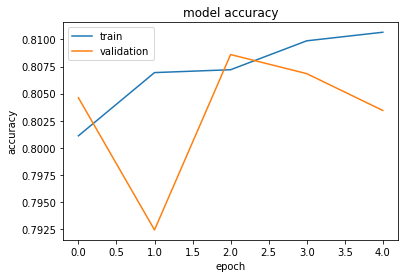

In [59]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


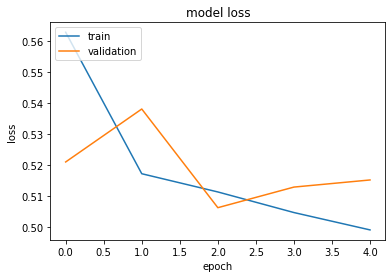

In [60]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()